# Lab 6


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.model_selection import train_test_split

In [3]:
filename="../6/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [4]:
RawNames=["signal","l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=["signal",'S_R', 'M_R', 'dPhi_r_b', 'MET_rel', 'M_TR_2', 'R', 'MT2', 'M_Delta_R'] #, 'axial_MET', 'cos_theta_r1']
rawdf = pd.DataFrame(df[RawNames])
featuredf = pd.DataFrame(df[FeatureNames])

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [5]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

In [6]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
X_Test=Test_Sample[VarNames[1:]]

y_Train=Train_Sample["signal"]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


In [7]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

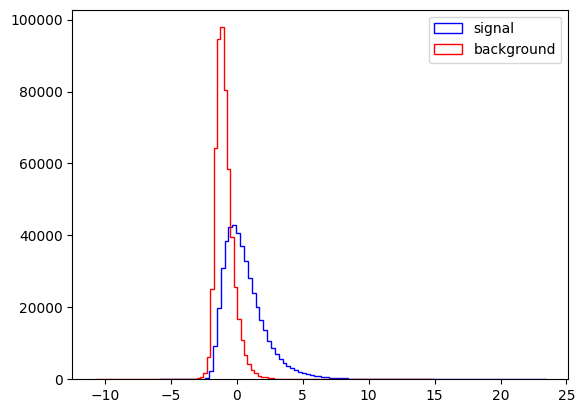

In [10]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [11]:
r_probs = [0 for _ in range(len(y_Test))]
test_probs = Fisher.predict_proba(X_Test)
train_probs = Fisher.predict_proba(X_Train)

test_probs = test_probs[:, 1]
train_probs = train_probs[:, 1]

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

In [13]:
r_auc = roc_auc_score(y_Test, r_probs)
test_auc = roc_auc_score(y_Test, test_probs)
train_auc = roc_auc_score(y_Train, train_probs)

r_fpr, r_tpr, _ = roc_curve(y_Test, r_probs)
test_fpr, test_tpr, _ = roc_curve(y_Test, test_probs)
train_fpr, train_tpr, _ = roc_curve(y_Train, train_probs)

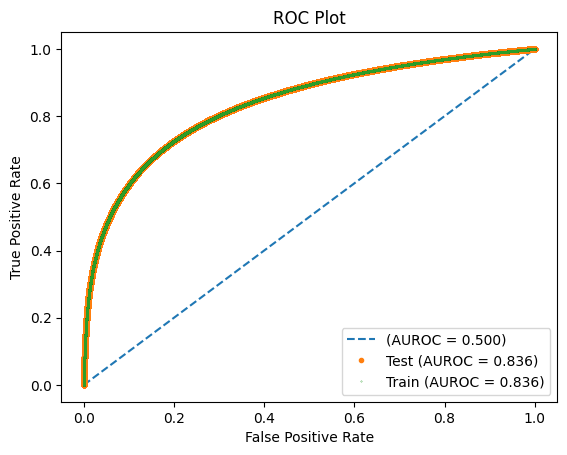

In [14]:
#plt.figure(figsize=(30,30))
plt.plot(r_fpr, r_tpr, ls="--", label="(AUROC = %0.3f)" % r_auc)
plt.plot(test_fpr, test_tpr, ls='', lw=1, marker='.', label="Test (AUROC = %0.3f)" % test_auc)
plt.plot(train_fpr, train_tpr, ls='', lw=1, marker='.', ms=0.5, label="Train (AUROC = %0.3f)" % train_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [15]:
rawTrain_Sample=rawdf[:N_Train]
rawTest_Sample=rawdf[N_Train:]

rawX_Train=rawTrain_Sample[RawNames[1:]]
rawX_Test=rawTest_Sample[RawNames[1:]]

rawy_Train=rawTrain_Sample["signal"]
rawy_Test=rawTest_Sample["signal"]

Fisher.fit(rawX_Train,rawy_Train)

LinearDiscriminantAnalysis()

In [16]:
rawr_probs = [0 for _ in range(len(rawy_Test))]
rawtest_probs = Fisher.predict_proba(rawX_Test)
rawtrain_probs = Fisher.predict_proba(rawX_Train)

rawtest_probs = rawtest_probs[:, 1]
rawtrain_probs = rawtrain_probs[:, 1]


rawr_auc = roc_auc_score(rawy_Test, rawr_probs)
rawtest_auc = roc_auc_score(rawy_Test, rawtest_probs)
rawtrain_auc = roc_auc_score(rawy_Train, rawtrain_probs)

rawr_fpr, rawr_tpr, _ = roc_curve(rawy_Test, rawr_probs)
rawtest_fpr, rawtest_tpr, _ = roc_curve(rawy_Test, rawtest_probs)
rawtrain_fpr, rawtrain_tpr, _ = roc_curve(rawy_Train, rawtrain_probs)

In [17]:
featureTrain_Sample=featuredf[:N_Train]
featureTest_Sample=featuredf[N_Train:]

featureX_Train=featureTrain_Sample[FeatureNames[1:]]
featureX_Test=featureTest_Sample[FeatureNames[1:]]

featurey_Train=featureTrain_Sample["signal"]
featurey_Test=featureTest_Sample["signal"]

Fisher.fit(rawX_Train,rawy_Train)

LinearDiscriminantAnalysis()

In [18]:
featurer_probs = [0 for _ in range(len(featurey_Test))]
featuretest_probs = Fisher.predict_proba(featureX_Test)
featuretrain_probs = Fisher.predict_proba(featureX_Train)

featuretest_probs = featuretest_probs[:, 1]
featuretrain_probs = featuretrain_probs[:, 1]


featurer_auc = roc_auc_score(featurey_Test, featurer_probs)
featuretest_auc = roc_auc_score(featurey_Test, featuretest_probs)
featuretrain_auc = roc_auc_score(featurey_Train, featuretrain_probs)

featurer_fpr, featurer_tpr, _ = roc_curve(featurey_Test, featurer_probs)
featuretest_fpr, featuretest_tpr, _ = roc_curve(featurey_Test, featuretest_probs)
featuretrain_fpr, featuretrain_tpr, _ = roc_curve(featurey_Train, featuretrain_probs)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- MET_rel
- MT2
- M_Delta_R
- M_R
- M_TR_2
- ...
Feature names seen at fit time, yet now missing:
- MET
- MET_phi
- l_1_eta
- l_1_pT
- l_1_phi
- ...


NameError: name 'featurer_fpr' is not defined

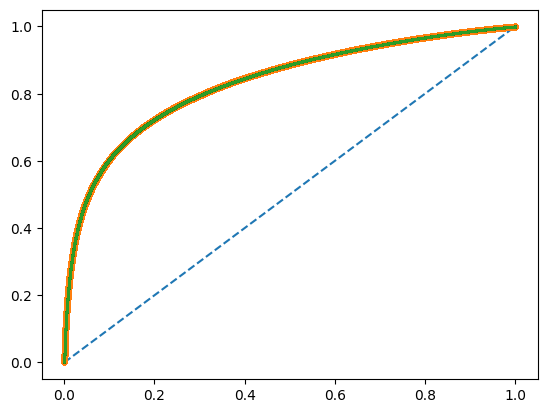

In [19]:
plt.plot(rawr_fpr, rawr_tpr, ls="--", label="(AUROC = %0.3f)" % rawr_auc)
plt.plot(rawtest_fpr, rawtest_tpr, ls='', lw=1, marker='.', label="Test (AUROC = %0.3f)" % rawtest_auc)
plt.plot(rawtrain_fpr, rawtrain_tpr, ls='', lw=1, marker='.', ms=0.5, label="Train (AUROC = %0.3f)" % rawtrain_auc)

plt.plot(featurer_fpr, featurer_tpr, ls="--", label="(AUROC = %0.3f)" % featurer_auc)
plt.plot(featuretest_fpr, featuretest_tpr, ls='', lw=1, marker='.', label="Test (AUROC = %0.3f)" % featuretest_auc)
plt.plot(featuretrain_fpr, featuretrain_tpr, ls='', lw=1, marker='.', ms=0.5, label="Train (AUROC = %0.3f)" % featuretrain_auc)

plt.plot(r_fpr, r_tpr, ls="--", label="(AUROC = %0.3f)" % r_auc)
plt.plot(test_fpr, test_tpr, ls='', lw=1, marker='.', label="Test (AUROC = %0.3f)" % test_auc)
plt.plot(train_fpr, train_tpr, ls='', lw=1, marker='.', ms=0.5, label="Train (AUROC = %0.3f)" % train_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

## A.)

In [20]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree

svmclf = svm.SVC()
sgdclf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
treeclf = tree.DecisionTreeClassifier()

## B.)

In [21]:
def perform_classification(clf,X_Train,y_Train,X_Test,y_Test,rawX_Train,rawy_Train,rawX_Test,rawy_Test,featureX_Train,featurey_Train,featureX_Test,featurey_Test):
    clf.fit(X_Train,y_Train)
    
    r_probs = [0 for _ in range(len(y_Test))]
    test_probs = clf.predict_proba(X_Test)
    train_probs = clf.predict_proba(X_Train)
    test_probs = test_probs[:, 1]
    train_probs = train_probs[:, 1]
    r_auc = roc_auc_score(y_Test, r_probs)
    test_auc = roc_auc_score(y_Test, test_probs)
    train_auc = roc_auc_score(y_Train, train_probs)
    r_fpr, r_tpr, _ = roc_curve(y_Test, r_probs)
    test_fpr, test_tpr, _ = roc_curve(y_Test, test_probs)
    train_fpr, train_tpr, _ = roc_curve(y_Train, train_probs)
    
    
    rawr_probs = [0 for _ in range(len(rawy_Test))]
    rawtest_probs = clf.predict_proba(rawX_Test)
    rawtrain_probs = clf.predict_proba(rawX_Train)
    rawtest_probs = rawtest_probs[:, 1]
    rawtrain_probs = rawtrain_probs[:, 1]
    rawr_auc = roc_auc_score(rawy_Test, rawr_probs)
    rawtest_auc = roc_auc_score(rawy_Test, rawtest_probs)
    rawtrain_auc = roc_auc_score(rawy_Train, rawtrain_probs)
    rawr_fpr, rawr_tpr, _ = roc_curve(rawy_Test, rawr_probs)
    rawtest_fpr, rawtest_tpr, _ = roc_curve(rawy_Test, rawtest_probs)
    rawtrain_fpr, rawtrain_tpr, _ = roc_curve(rawy_Train, rawtrain_probs)
    
    
    featurer_probs = [0 for _ in range(len(featurey_Test))]
    featuretest_probs = clf.predict_proba(featureX_Test)
    featuretrain_probs = clf.predict_proba(featureX_Train)
    featuretest_probs = featuretest_probs[:, 1]
    featuretrain_probs = featuretrain_probs[:, 1]
    featurer_auc = roc_auc_score(featurey_Test, featurer_probs)
    featuretest_auc = roc_auc_score(featurey_Test, featuretest_probs)
    featuretrain_auc = roc_auc_score(featurey_Train, featuretrain_probs)
    featurer_fpr, featurer_tpr, _ = roc_curve(featurey_Test, featurer_probs)
    featuretest_fpr, featuretest_tpr, _ = roc_curve(featurey_Test, featuretest_probs)
    featuretrain_fpr, featuretrain_tpr, _ = roc_curve(featurey_Train, featuretrain_probs)
    
    
    plt.plot(rawr_fpr, rawr_tpr, ls="--", label="(AUROC = %0.3f)" % rawr_auc)
    plt.plot(rawtest_fpr, rawtest_tpr, ls='', lw=1, marker='.', label="Test (AUROC = %0.3f)" % rawtest_auc)
    plt.plot(rawtrain_fpr, rawtrain_tpr, ls='', lw=1, marker='.', ms=0.5, label="Train (AUROC = %0.3f)" % rawtrain_auc)

    plt.plot(featurer_fpr, featurer_tpr, ls="--", label="(AUROC = %0.3f)" % featurer_auc)
    plt.plot(featuretest_fpr, featuretest_tpr, ls='', lw=1, marker='.', label="Test (AUROC = %0.3f)" % featuretest_auc)
    plt.plot(featuretrain_fpr, featuretrain_tpr, ls='', lw=1, marker='.', ms=0.5, label="Train (AUROC = %0.3f)" % featuretrain_auc)

    plt.plot(r_fpr, r_tpr, ls="--", label="(AUROC = %0.3f)" % r_auc)
    plt.plot(test_fpr, test_tpr, ls='', lw=1, marker='.', label="Test (AUROC = %0.3f)" % test_auc)
    plt.plot(train_fpr, train_tpr, ls='', lw=1, marker='.', ms=0.5, label="Train (AUROC = %0.3f)" % train_auc)

    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    
    